In [46]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import sys
sys.path.append(os.path.dirname(os.getcwd())) # Insert all modules from the folder above
print(os.path.dirname(os.getcwd())) # Insert all modules from the folder above)
from tops.config import LazyConfig, instantiate

/Users/martinjohannesnilsen/NTNU/Datateknologi/2. semester/TDT4265 - Computer Vision and Deep Learning/Assignment 4/src/SSD


In [47]:
def plot_bbox(ax, box, color, circle=True):
    cx, cy, w, h = box
    cx *= cfg.train.imshape[1]
    cy *= cfg.train.imshape[0]
    w *= cfg.train.imshape[1]
    h *= cfg.train.imshape[0]
    x1, y1 = cx + w/2, cy + h/2
    x0, y0 = cx - w/2, cy - h/2
    if circle:
        ax.add_artist(matplotlib.patches.Ellipse([cx, cy], w,h, alpha=.1, color=color))
        plt.plot(cx, cy, f"o{color}")
    else:
        plt.plot([x0, x0, x1, x1, x0],[y0, y1, y1, y0, y0], f"{color}", alpha=.5)
        
def get_num_boxes_in_fmap(idx):
    boxes_per_location = 2 + 2*len(cfg.anchors.aspect_ratios[idx])
    feature_map_size = cfg.anchors.feature_sizes[idx]
    return int(boxes_per_location * np.prod(feature_map_size))

In [48]:
cfg = LazyConfig.load("../configs/ssd300.py")
anchors = instantiate(cfg.anchors)(order="xywh")
print("Number of anchors:", len(anchors))

PLOT_CIRCLE = False
fmap_idx_to_visualize = 3
print("Aspect used for feature map:", cfg.anchors.aspect_ratios[fmap_idx_to_visualize])
# Set which aspect ratio indices we want to visualize
aspect_ratio_indices = [3]

offset = sum([get_num_boxes_in_fmap(prev_layer) for prev_layer in range(fmap_idx_to_visualize)])

Number of anchors: 8732
Aspect used for feature map: [2, 3]


In [49]:
print(get_num_boxes_in_fmap(3))

150


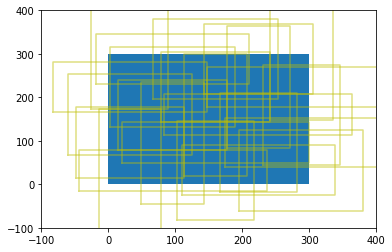

In [50]:
fig, ax = plt.subplots()

# Set up our scene
plt.ylim([-100, cfg.train.imshape[0]+100])
plt.xlim([-100, cfg.train.imshape[1]+100])

boxes_per_location = 2 + 2*len(cfg.anchors.aspect_ratios[fmap_idx_to_visualize])
indices_to_visualize = []
colors = []
available_colors = ["r", "g", "b", "y", "m", "b","w"]
for idx in range(offset, offset + get_num_boxes_in_fmap(fmap_idx_to_visualize)):
    for aspect_ratio_idx in aspect_ratio_indices:
        if idx % boxes_per_location == aspect_ratio_idx:
            indices_to_visualize.append(idx)
            colors.append(available_colors[aspect_ratio_idx])

ax.add_artist(plt.Rectangle([0, 0], cfg.train.imshape[1], cfg.train.imshape[0]))
for i, idx in enumerate(indices_to_visualize):
    prior = anchors[idx]
    color = colors[i]
    plot_bbox(ax, prior, color, PLOT_CIRCLE)
plt.show()